In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from competing_methods_local import *
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler

/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

### Classification

In [3]:
task = "classification" 
combined_df = pd.DataFrame()
datasets = ["openml_146819", "openml_361070", "openml_361062","openml_9946","openml_43","openml_9978"]
for data in datasets:
    ablation_directory =f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_{task}_{data}/{data}_selection_vary_sample_size/varying_sample_row_n"
    split_seeds = [1,2,3,4]
    rf_seed = 1
    sample_seeds = [1,2,3,4,5]
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{rf_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)

In [4]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

data_name = {
    "openml_43": "Spam",
    "openml_9946": "Breast Cancer",
    "openml_9978": "Ozone",
    "openml_146819": "Climate",
    "openml_361062": "Pol",
    "openml_361070": "Eye Movement"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'bLoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
}

In [5]:
# datasets = df["data"].unique()
# sample_size_all = [500]#df["sample_row_n"].unique()
# marker_size = 7

# # Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
# n_cols = len(sample_size_all)  # One column per PVE
# n_rows = len(datasets)          # One row per dataset

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 5 * n_rows),
#     sharey=False  # Share y-axis across columns for easier comparison
# )

# # Ensure axs is 2D for easy indexing
# if n_rows == 1:
#     axs = np.expand_dims(axs, axis=0)
# if n_cols == 1:
#     axs = np.expand_dims(axs, axis=1)

# # Loop through each dataset (row) and PVE (column)
# for row_idx, dataset in enumerate(datasets):
#     for col_idx, sample_size in enumerate(sample_size_all):
#         ax = axs[row_idx, col_idx]
#         subset = df[(df["data"] == dataset) & (df["sample_row_n"] == sample_size)]
        
#         # Plot results for each method
#         for method in methods:
#             method_data = subset[subset["fi"] == method]
            
#             if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#                 ax.plot(
#                     [0.1, 0.2, 0.3, 0.4], method_data[["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]].values[0],
#                     linestyle='solid', marker='o', markersize=marker_size,
#                     label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
#                 )
#             else:
#                 ax.plot(
#                     [0.1, 0.2, 0.3, 0.4], method_data[["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]].values[0], 
#                     linestyle='solid', marker='o', markersize=marker_size,
#                     label=methods_name[method], color=color_map[method], linewidth=3
#                 )
        
#         # Set x-axis labels and ticks
#         ax.set_xticks([0.1, 0.2, 0.3, 0.4])
#         ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=25)
#         ax.tick_params(axis='y', labelsize=25)
#         if row_idx == n_rows - 1:  # Label x-axis only for the last row
#             ax.set_xlabel("Percentage of Features Selected", fontsize=30)
        
#         # Set y-axis labels only for the first column
#         if col_idx == 0:
#             dataset_label = data_name[dataset].replace(' ', r'\ ')
#             ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\n$AUROC$", fontsize=30)
#         else:
#             ax.set_ylabel("")
        
#         # set this for the first row
#         if row_idx == 0:
#             ax.set_title(rf"$N = {sample_size}$", fontsize=30)

#         # Add legend to the last subplot of the row
#         if col_idx == n_cols - 1:
#             ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and spacing
# plt.tight_layout(rect=[0.01, 0, 1, 1])
# plt.savefig("feature_selection_classification_vary_sample_size.png")
# plt.show()

/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


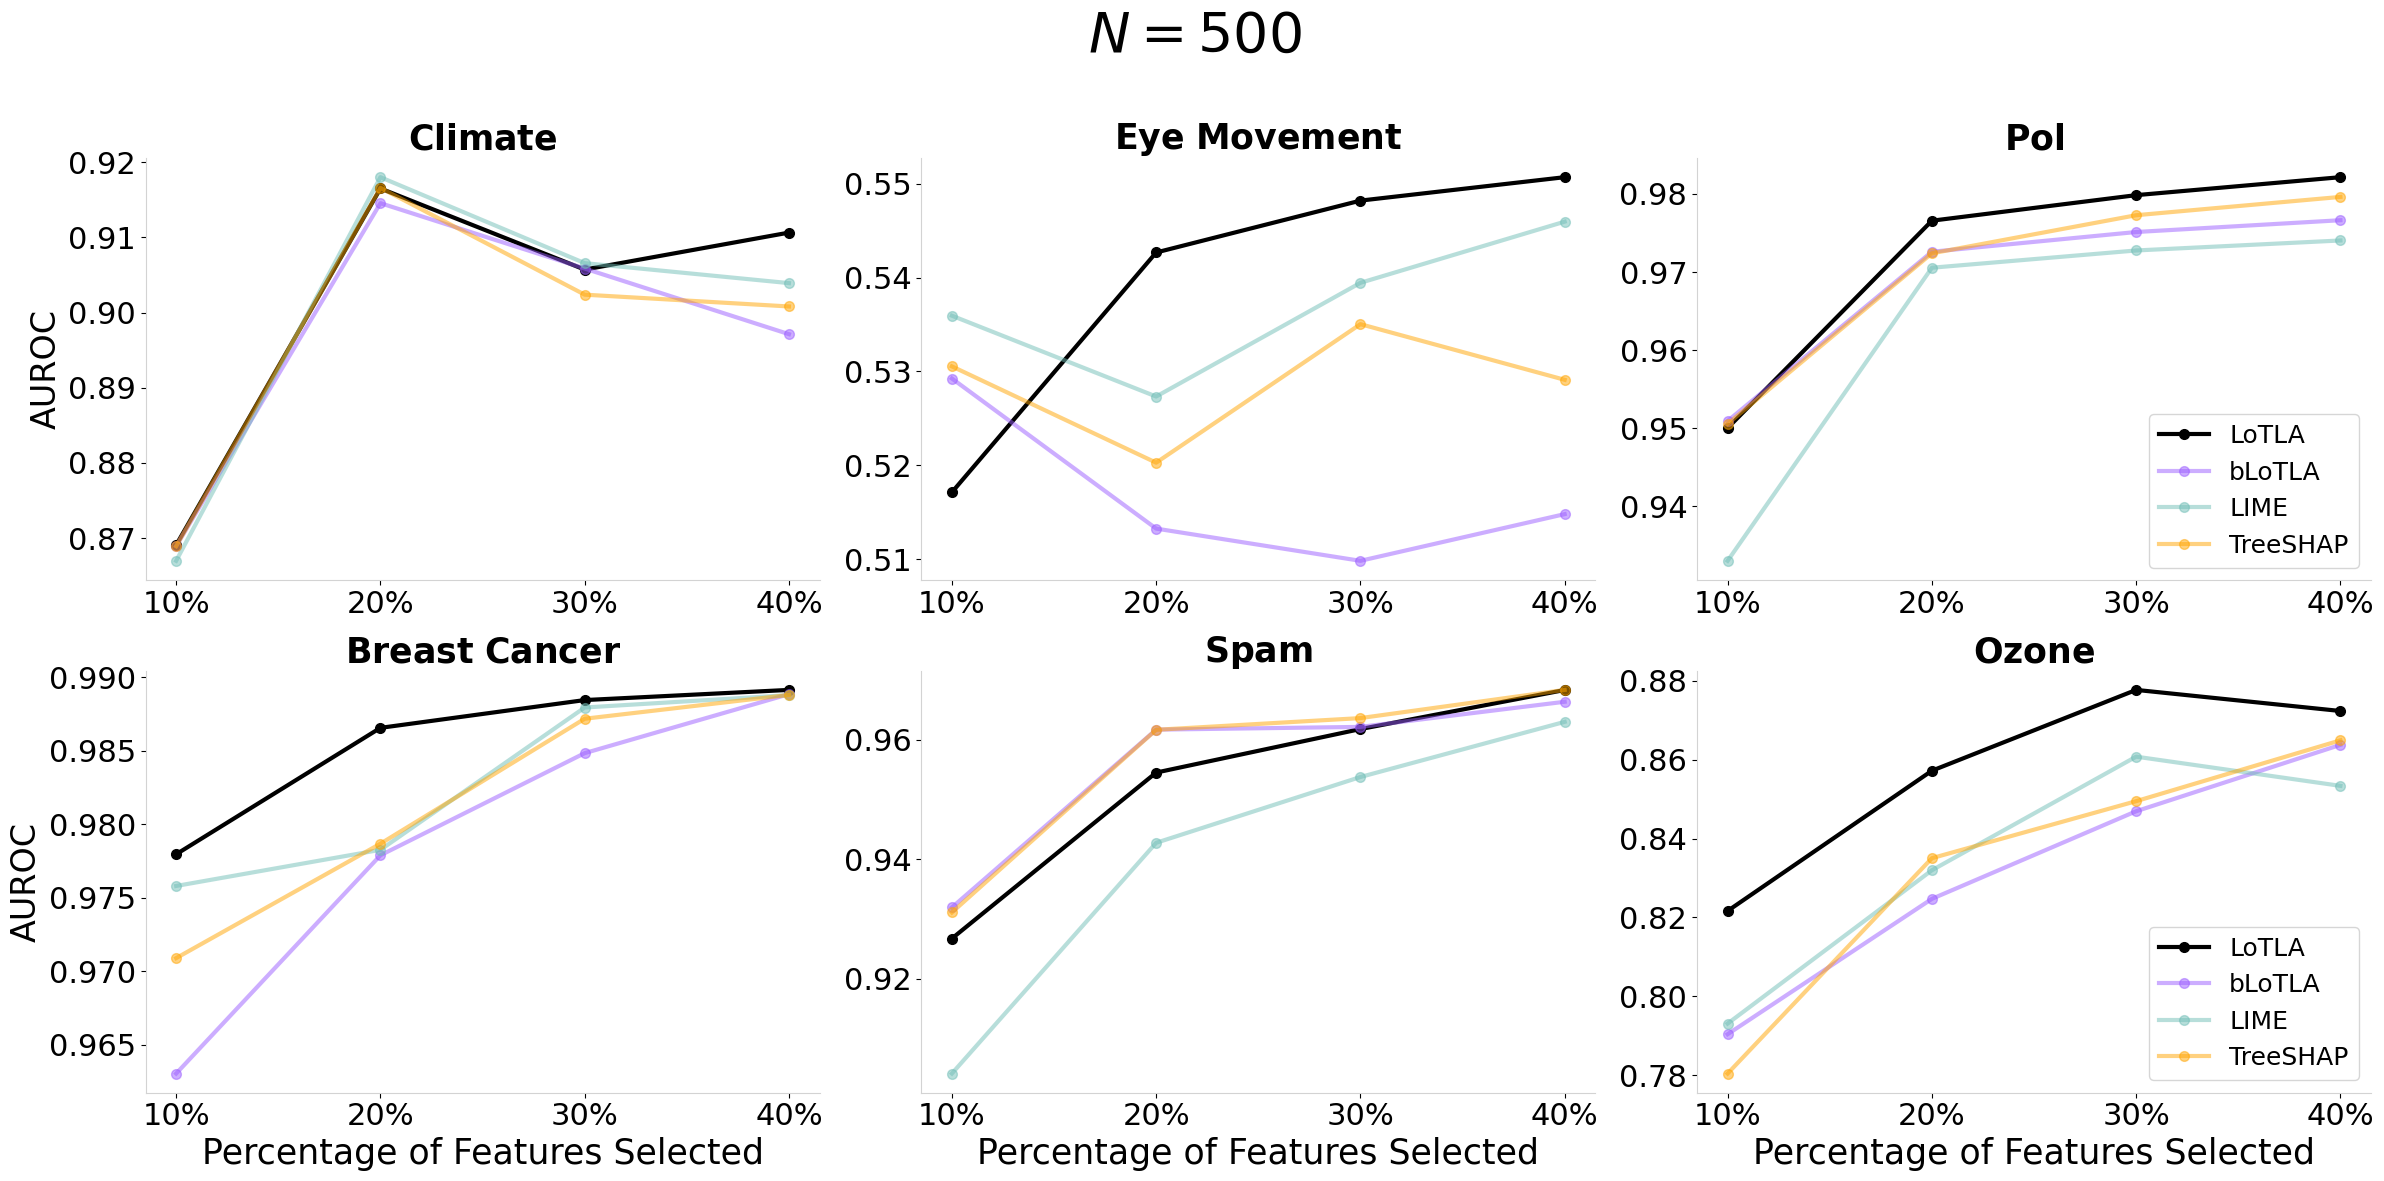

In [6]:
df = combined_df[combined_df["sample_row_n"] == 500]  
datasets = df["data"].unique()

marker_size = 7
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']  # This is retained in case you need it later

# Determine number of rows and columns
n_cols = 3
n_rows = 2#len(datasets) // n_cols

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6 * n_rows),
    sharey=False
)

# Flatten axes for easier indexing
axs = axs.flatten()

# Loop through each dataset
for idx, dataset in enumerate(datasets):
    ax = axs[idx]
    subset = df[df["data"] == dataset]
    
    # Plot results for each method
    for method in methods:
        method_data = subset[subset["fi"] == method]
        results = method_data[
            ["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]
        ].mean(axis=0).values
        
        if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
            ax.plot(
                [0.1, 0.2, 0.3, 0.4], results,
                label=methods_name[method], linestyle='solid',  # Only dotted lines
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3, alpha=0.5
            )
        else:
            ax.plot(
                [0.1, 0.2, 0.3, 0.4], results,
                label=methods_name[method], linestyle='solid',  # Only solid lines
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3
            )
    
    # Set x-axis and labels
    ax.set_xticks([0.1, 0.2, 0.3, 0.4])
    ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=22)
    ax.tick_params(axis='y', labelsize=22)
    if idx >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Percentage of Features Selected", fontsize=25)
    
    # Only set y-axis label for the first plot in each row
    if idx % n_cols == 0:
        ax.set_ylabel("AUROC", fontsize=24)
    else:
        ax.set_ylabel("")
    
    # Set subplot title
    dataset_label = data_name[dataset].replace(' ', r'\ ')
    ax.set_title(f"$\\mathbf{{{dataset_label}}}$", fontsize=25)
    
    # Add legend to the last plot in each row
    if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
        ax.legend(fontsize=18, loc='lower right')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.suptitle(
    r"$N=500$", 
    fontsize=40,
    ha='center',
    fontweight='bold'
)
plt.savefig("feature_selection_classification_500.png")
plt.show()


#### Compute avg ranking per method

In [7]:
df_summary = df.groupby(['fi', 'data'])[["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]].mean().reset_index()
columns_to_rank = ['RF_Classifier_AUROC_top_0.1', 'RF_Classifier_AUROC_top_0.2', 
                   'RF_Classifier_AUROC_top_0.3', 'RF_Classifier_AUROC_top_0.4']
rank_results_classification = pd.DataFrame()
for data in datasets:
    df_data = df_summary[df_summary["data"] == data]
    ranked_df = df_data.copy()
    for col in columns_to_rank:
        ranked_df[col] = df_data[col].rank(ascending=False, method='min')
    rank_results_classification = pd.concat([rank_results_classification, ranked_df], ignore_index=True)

#rename columns
rank_results_classification.columns = ['fi', 'data', 'top_0.1', 'top_0.2', 'top_0.3', 'top_0.4']

In [8]:
# df = combined_df
# datasets = df["data"].unique()

# marker_size = 7
# dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# # Determine number of rows and columns
# n_cols = 3
# n_rows = len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[df["data"] == dataset]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
#         results = method_data[
#             ["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]
#         ].mean(axis=0).values
        
#         linestyle = 'dotted' if method in dotted_methods else 'solid'
#         ax.plot(
#             [0.1, 0.2, 0.3, 0.4], results,
#             label=methods_name[method], linestyle=linestyle,
#             marker='o', markersize=marker_size, color=color_map[method]
#         )
    
#     # Set x-axis and labels
#     ax.set_xticks([0.1, 0.2, 0.3, 0.4])
#     ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Percentage of features selected", fontsize=22)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel("AUROC", fontsize=24)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=24)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=18, loc='lower right')

# plt.tight_layout(rect=[0, 0, 1, 0.9])
# # Add a title at the top
# plt.suptitle(
#     "Feature Selection Experiments - Classification Datasets", 
#     fontsize=30,  # Larger font size
#     fontweight='bold',  # Bold text
#     ha='center'  # Center-align the title
# )
# plt.show()

### Regression

In [9]:
task = "regression" 
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361622", "openml_361254",  "openml_361259", "openml_361253", "openml_361242"]
for data in datasets:
    ablation_directory =f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_{task}_{data}/{data}_selection_vary_sample_size/varying_sample_row_n"
    split_seeds = [1,2,3,4]
    rf_seed = 1
    sample_seeds = [1,2,3,4,5]
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
            df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{rf_seed}_{sample_seed}/results.csv"))
            df["data"] = data
            combined_df = pd.concat([combined_df, df], ignore_index=True)

In [10]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

data_name = {
    "openml_361260": "Miami Housing",
    "openml_361622": "Cars",
    "openml_361254": "SARCOS",
    "openml_361259": "Puma Robot",
    "openml_361253": "Wave Energy",
    "openml_361242": "Super Conductivitity"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'bLoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
}

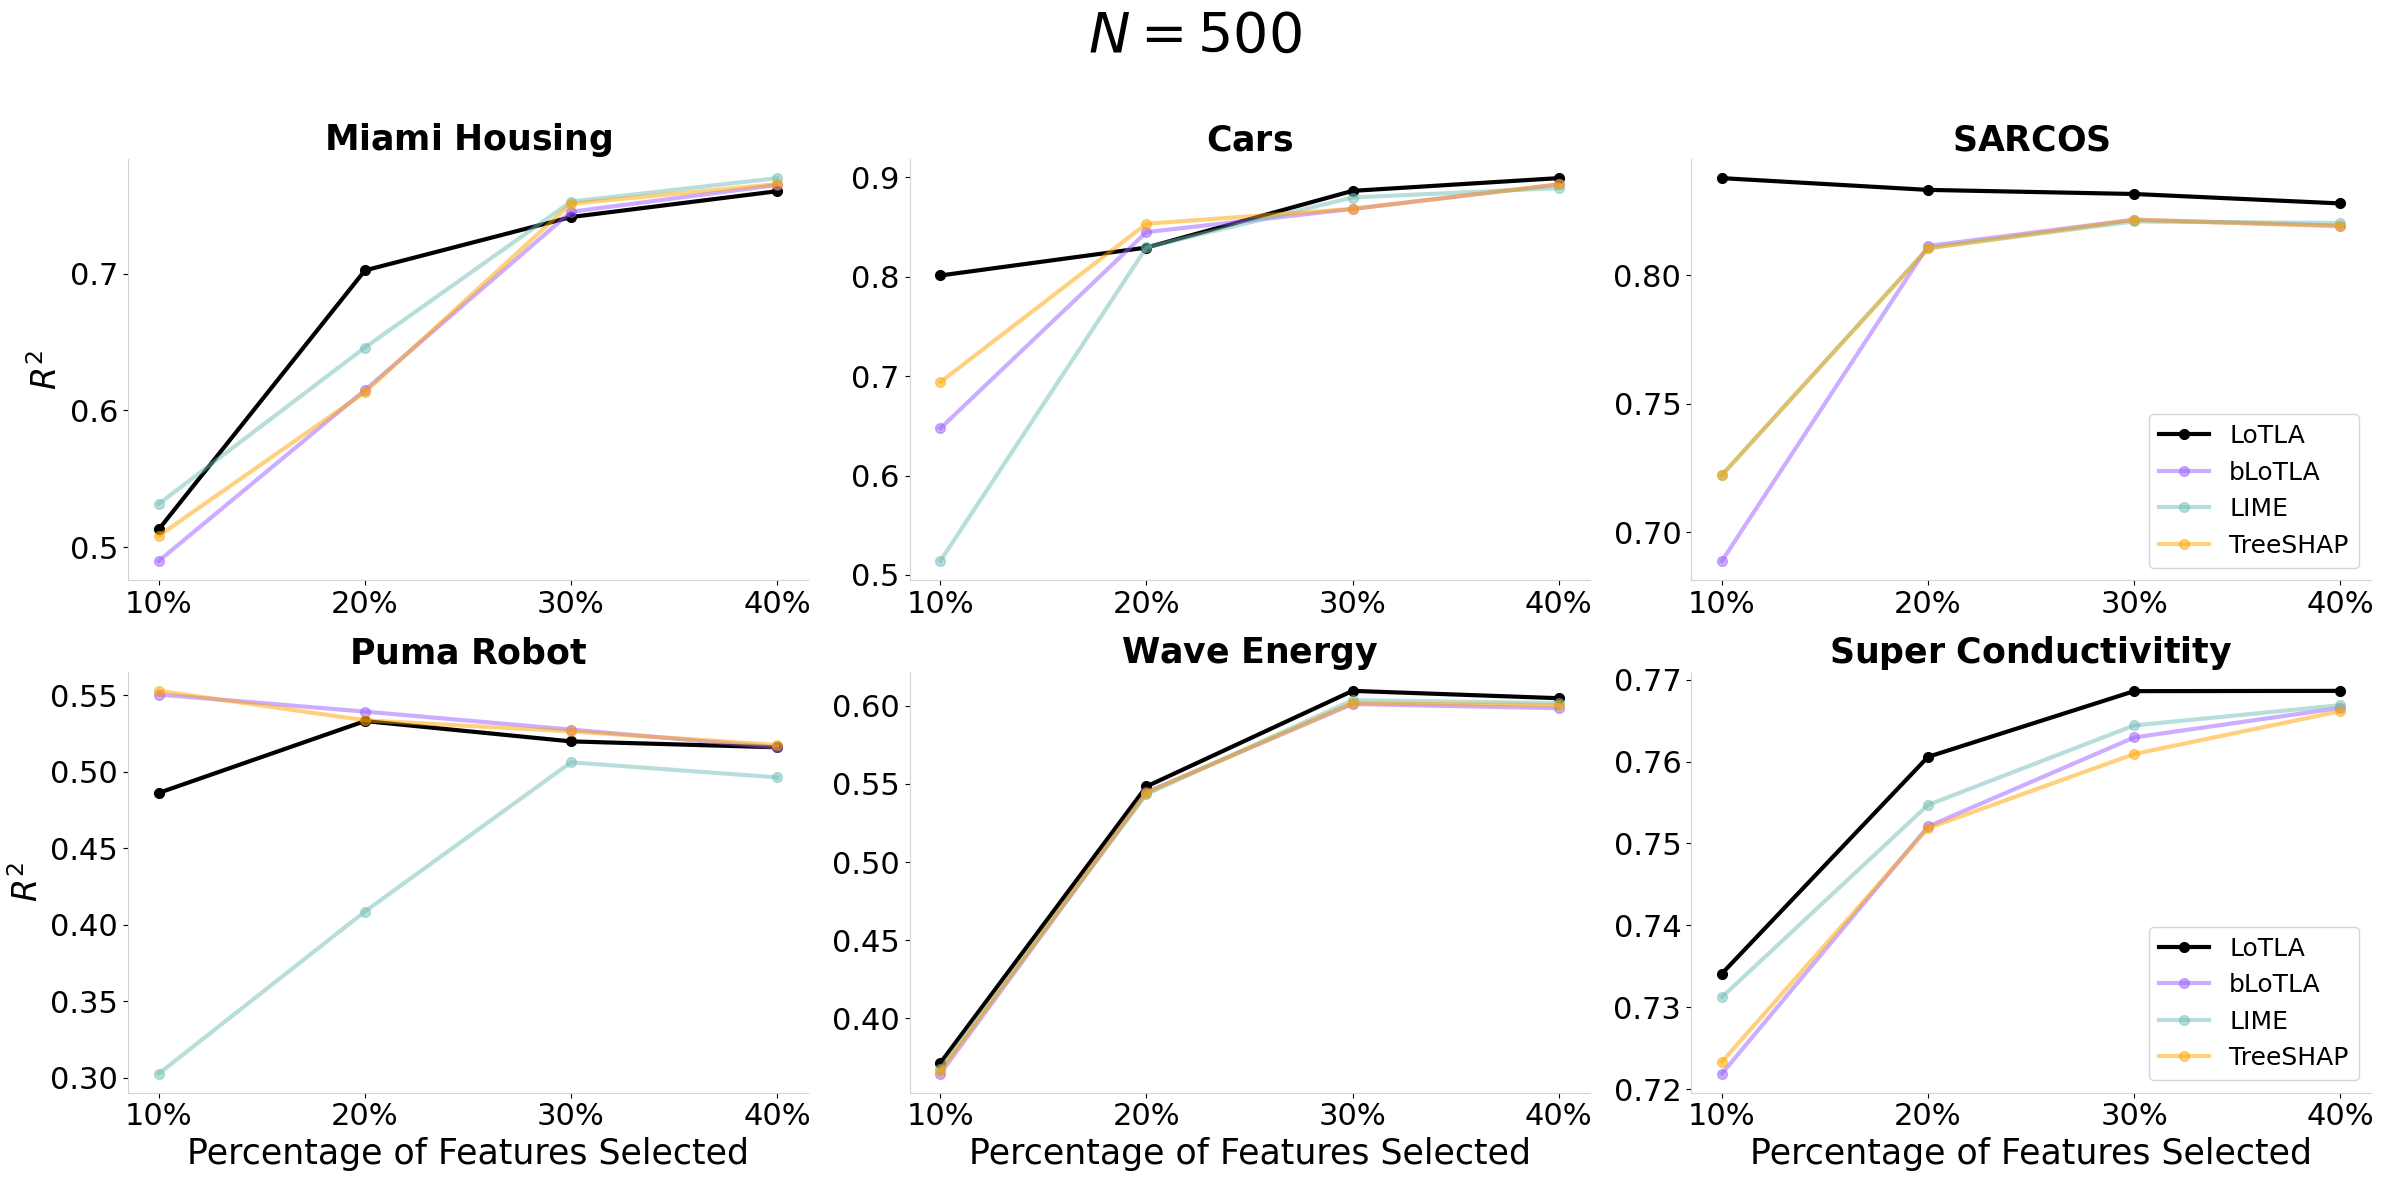

In [11]:
df = combined_df[combined_df["sample_row_n"] == 500]  
datasets = df["data"].unique()

marker_size = 7

# Determine number of rows and columns
n_cols = 3
n_rows = 2  # len(datasets) // n_cols

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6 * n_rows),
    sharey=False
)

# Flatten axes for easier indexing
axs = axs.flatten()

# Loop through each dataset
for idx, dataset in enumerate(datasets):
    ax = axs[idx]
    subset = df[df["data"] == dataset]
    
    # Plot results for each method
    for method in methods:
        method_data = subset[subset["fi"] == method]
        results = method_data[
            ["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]
        ].mean(axis=0).values
        
        if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
            ax.plot(
                [0.1, 0.2, 0.3, 0.4], results,
                label=methods_name[method], linestyle='solid',  # Only solid lines
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3, alpha=0.5
            )
        else:
            ax.plot(
                [0.1, 0.2, 0.3, 0.4], results,
                label=methods_name[method], linestyle='solid',  # Only solid lines
                marker='o', markersize=marker_size, color=color_map[method], linewidth=3
            )
    
    # Set x-axis and labels
    ax.set_xticks([0.1, 0.2, 0.3, 0.4])
    ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=22)
    ax.tick_params(axis='y', labelsize=22)    
    if idx >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Percentage of Features Selected", fontsize=25)
    
    # Only set y-axis label for the first plot in each row
    if idx % n_cols == 0:
        ax.set_ylabel(r"$R^2$", fontsize=24)
    else:
        ax.set_ylabel("")
    
    # Set subplot title
    dataset_label = data_name[dataset].replace(' ', r'\ ')
    ax.set_title(f"$\\mathbf{{{dataset_label}}}$", fontsize=25)
    
    # Add legend to the last plot in each row
    if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
        ax.legend(fontsize=18, loc='lower right')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.suptitle(
    r"$N=500$", 
    fontsize=40,
    ha='center',
    fontweight='bold'
)
plt.savefig("feature_selection_regression_500.png")
plt.show()

In [12]:
df_summary = df.groupby(['fi', 'data'])[["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]].mean().reset_index()
columns_to_rank = ["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]
rank_results_regression = pd.DataFrame()
for data in datasets:
    df_data = df_summary[df_summary["data"] == data]
    ranked_df = df_data.copy()
    for col in columns_to_rank:
        ranked_df[col] = df_data[col].rank(ascending=False, method='min')
    rank_results_regression = pd.concat([rank_results_regression, ranked_df], ignore_index=True)
rank_results_regression.columns = ['fi', 'data', 'top_0.1', 'top_0.2', 'top_0.3', 'top_0.4']

In [13]:
rank_results = pd.concat([rank_results_classification, rank_results_regression], ignore_index=True)
rank_results.groupby('fi')[['top_0.1', 'top_0.2', 'top_0.3', 'top_0.4']].mean().sort_values(by='top_0.1')

,top_0.1,top_0.2,top_0.3,top_0.4
fi,,,,
Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus,1.833333,1.750000,1.750000,1.416667
TreeSHAP_RF,2.416667,2.666667,2.666667,2.500000
LIME_RF,2.750000,2.916667,2.500000,2.916667
MDI,2.916667,2.666667,3.083333,3.166667


In [14]:
# datasets = df["data"].unique()
# sample_size_all = df["sample_row_n"].unique()
# marker_size = 7

# # Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
# n_cols = len(sample_size_all)  # One column per PVE
# n_rows = len(datasets)          # One row per dataset

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 5 * n_rows),
#     sharey=False  # Share y-axis across columns for easier comparison
# )

# # Ensure axs is 2D for easy indexing
# if n_rows == 1:
#     axs = np.expand_dims(axs, axis=0)
# if n_cols == 1:
#     axs = np.expand_dims(axs, axis=1)

# # Loop through each dataset (row) and PVE (column)
# for row_idx, dataset in enumerate(datasets):
#     for col_idx, sample_size in enumerate(sample_size_all):
#         ax = axs[row_idx, col_idx]
#         subset = df[(df["data"] == dataset) & (df["sample_row_n"] == sample_size)]
        
#         # Plot results for each method
#         for method in methods:
#             method_data = subset[subset["fi"] == method]
            
#             if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#                 ax.plot(
#                     [0.1, 0.2, 0.3, 0.4], method_data[["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]].values[0],
#                     linestyle='solid', marker='o', markersize=marker_size,
#                     label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
#                 )
#             else:
#                 ax.plot(
#                     [0.1, 0.2, 0.3, 0.4], method_data[["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]].values[0], 
#                     linestyle='solid', marker='o', markersize=marker_size,
#                     label=methods_name[method], color=color_map[method], linewidth=3
#                 )
        
#         # Set x-axis labels and ticks
#         ax.set_xticks([0.1, 0.2, 0.3, 0.4])
#         ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=25)
#         ax.tick_params(axis='y', labelsize=25)
#         if row_idx == n_rows - 1:  # Label x-axis only for the last row
#             ax.set_xlabel("Percentage of Features Selected", fontsize=30)
        
#         # Set y-axis labels only for the first column
#         if col_idx == 0:
#             dataset_label = data_name[dataset].replace(' ', r'\ ')
#             ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\n$R^2$", fontsize=30)
#         else:
#             ax.set_ylabel("")
        
#         # set this for the first row
#         if row_idx == 0:
#             ax.set_title(rf"$N = {sample_size}$", fontsize=30)

#         # Add legend to the last subplot of the row
#         if col_idx == n_cols - 1:
#             ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and spacing
# plt.tight_layout(rect=[0.01, 0, 1, 1])
# plt.savefig("feature_selection_regression_vary_sample_size.png")
# plt.show()

In [15]:
# df = combined_df
# datasets = df["data"].unique()

# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2  # len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[df["data"] == dataset]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
#         results = method_data[
#             ["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]
#         ].mean(axis=0).values
        
#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 [0.1, 0.2, 0.3, 0.4], results,
#                 label=methods_name[method], linestyle='solid',  # Only solid lines
#                 marker='o', markersize=marker_size, color=color_map[method], linewidth=3, alpha=0.5
#             )
#         else:
#             ax.plot(
#                 [0.1, 0.2, 0.3, 0.4], results,
#                 label=methods_name[method], linestyle='solid',  # Only solid lines
#                 marker='o', markersize=marker_size, color=color_map[method], linewidth=3
#             )
    
#     # Set x-axis and labels
#     ax.set_xticks([0.1, 0.2, 0.3, 0.4])
#     ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=22)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Percentage of Features Selected", fontsize=25)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$R^2$", fontsize=24)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     dataset_label = data_name[dataset].replace(' ', r'\ ')
#     ax.set_title(f"$\\mathbf{{{dataset_label}}}$", fontsize=25)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=18, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 1])
# # Add a title at the top
# plt.savefig("feature_selection_regression.png")
# plt.show()

In [16]:
# df = combined_df
# datasets = df["data"].unique()

# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6.5 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[df["data"] == dataset]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
#         results = method_data[
#             ["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]
#         ].mean(axis=0).values
        
#         linestyle = 'dotted' if method in dotted_methods else 'solid'
#         ax.plot(
#             [0.1, 0.2, 0.3, 0.4], results,
#             label=methods_name[method], linestyle=linestyle,
#             marker='o', markersize=marker_size, color=color_map[method]
#         )
    
#     # Set x-axis and labels
#     ax.set_xticks([0.1, 0.2, 0.3, 0.4])
#     ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Percentage of features selected", fontsize=22)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel("R-Square", fontsize=24)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=24)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=18, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# # Add a title at the top
# plt.suptitle(
#     "Feature Selection Experiments - Regression Datasets", 
#     fontsize=30,  # Larger font size
#     fontweight='bold',  # Bold text
#     ha='center'  # Center-align the title
# )
# plt.show()